In [18]:
import pandas as pd
import numpy  as np

In [36]:
lojas = pd.read_excel('data/Cadastro_Lojas.xlsx')
lojas.head(5)


,Cadastro Lojas - 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Id Loja,Localidade,Cidade,Tipo Loja,Nome Gerente,Sobrenome Gerente,NaN
3,423,Inglaterra - Europa,Basingstoke Hants,Física,Beatriz,Lima,NaN
4,424,Estados Unidos - América do Norte,Bellevue,Física,Maria,Costa,NaN


In [37]:
lojas = lojas.dropna(how='all')
lojas = lojas.dropna(axis=1)
columns = lojas.iloc[0].to_list()
lojas = lojas.iloc[1:]
lojas.columns = columns
lojas.head()

,Id Loja,Localidade,Cidade,Tipo Loja,Nome Gerente,Sobrenome Gerente
3,423,Inglaterra - Europa,Basingstoke Hants,Física,Beatriz,Lima
4,424,Estados Unidos - América do Norte,Bellevue,Física,Maria,Costa
5,425,Austrália - Austrália,Bendigo,Física,João,Mendes
6,426,Inglaterra - Europa,Berks,Online,Sofia,Rocha
7,430,Estados Unidos - América do Norte,Beverly Hills,Física,Lucas,Gomes


In [ ]:
lojas[['Pais','Continente']] = lojas['Localidade'].str.split(' - ', expand=True)
lojas['Gerente'] = lojas['Nome Gerente']  + ' ' + lojas['Sobrenome Gerente']
lojas = lojas.drop(['Localidade','Nome Gerente','Sobrenome Gerente'], axis=1)
lojas.head()

,Id Loja,Cidade,Tipo Loja,Pais,Continente,Gerente
3,423,Basingstoke Hants,Física,Inglaterra,Europa,Beatriz Lima
4,424,Bellevue,Física,Estados Unidos,América do Norte,Maria Costa
5,425,Bendigo,Física,Austrália,Austrália,João Mendes
6,426,Berks,Online,Inglaterra,Europa,Sofia Rocha
7,430,Beverly Hills,Física,Estados Unidos,América do Norte,Lucas Gomes


In [148]:
produtos = pd.read_excel('data/Cadastro_Produto.xlsx')
produtos['Marca'] = produtos['Marca'].str.strip()
produtos.head(5)

,Id Produto,Nome Produto,Categoria,Marca,Preço Unit.,Custo Unit.
0,1037,A. Datum Advanced Digital Camera M300 Azure,Cameras and camcorders,A. Datum,188.50,86.68
1,953,A. Datum Advanced Digital Camera M300 Black,Cameras and camcorders,A. Datum,188.50,86.68
2,1023,A. Datum Advanced Digital Camera M300 Green,Cameras and camcorders,A. Datum,188.50,86.68
3,967,A. Datum Advanced Digital Camera M300 Grey,Cameras and camcorders,A. Datum,188.50,86.68
4,1009,A. Datum Advanced Digital Camera M300 Orange,Cameras and camcorders,A. Datum,188.50,86.68


In [45]:
clientes = pd.read_excel('data/Cadastro_Clientes.xlsx')
clientes.head(5)

,Id Cliente,Nome Completo,Genero,Data de Nacimento
0,1,"P., Juana",F,1991-04-07
1,2,"L., Apoliano",M,1990-05-13
2,3,"G., Thatiane",F,1990-08-11
3,4,"R., Gate",F,1993-02-13
4,5,"N., Darcio",M,1993-08-07


In [46]:
clientes['Nome Completo'] = clientes['Nome Completo'].apply(lambda x: f"{x.split(', ')[1]} {x.split(', ')[0]}")
clientes['Genero'] = clientes['Genero'].replace({'F': 'Feminino','M':'Masculino'})
clientes.head()

,Id Cliente,Nome Completo,Genero,Data de Nacimento
0,1,Juana P.,Feminino,1991-04-07
1,2,Apoliano L.,Masculino,1990-05-13
2,3,Thatiane G.,Feminino,1990-08-11
3,4,Gate R.,Feminino,1993-02-13
4,5,Darcio N.,Masculino,1993-08-07


In [47]:
def faixa_etaria(x):
    if x < 25:
        return 'Jovem'
    elif x < 50:
        return 'Adulto'
    else:
        return 'Idoso'

In [48]:
hoje = pd.to_datetime('today')
clientes['Idade'] = clientes['Data de Nacimento'].apply(lambda x: hoje.year - x.year - ((hoje.month, hoje.day) < (x.month, x.day)))
clientes['Faixa Etaria'] = clientes['Idade'].apply(faixa_etaria)
clientes.head()

,Id Cliente,Nome Completo,Genero,Data de Nacimento,Idade,Faixa Etaria
0,1,Juana P.,Feminino,1991-04-07,34,Adulto
1,2,Apoliano L.,Masculino,1990-05-13,35,Adulto
2,3,Thatiane G.,Feminino,1990-08-11,34,Adulto
3,4,Gate R.,Feminino,1993-02-13,32,Adulto
4,5,Darcio N.,Masculino,1993-08-07,31,Adulto


In [50]:
vendas_2022 = pd.read_excel('data/Base_Vendas-2022.xlsx')
vendas_2023 = pd.read_excel('data/Base_Vendas-2023.xlsx')
vendas_2024 = pd.read_excel('data/Base_Vendas-2024.xlsx')
vendas_2022.head()

,Data Venda,Id Loja,Id Produto,Id Cliente,Qtd. Vendida,Qtd. Devolvida,Preco Unitario
0,2022-01-01,500,83,7604,1,0,99.99
1,2022-01-01,879,83,7605,2,0,99.99
2,2022-01-01,679,83,7606,1,0,99.99
3,2022-01-01,791,83,7607,1,0,99.99
4,2022-01-01,644,83,7608,4,0,99.99


In [129]:
vendas = pd.concat([vendas_2022,vendas_2023,vendas_2024])

In [130]:
#alguns valores forem covertido para, por exemplo, 2567.,8, entao retirei os '.' e ',' e dividi por 100, ja que todos os valores tem 2 casas decimais
vendas['Preco Unitario'] = vendas['Preco Unitario'].astype(str).str.replace(r'\.(?=\d)', '', regex=True)
vendas['Preco Unitario'] = vendas['Preco Unitario'].astype(str).str.replace(',', '', regex=True) 
#vendas['Preco Unitario'] = pd.to_numeric(vendas['Preco Unitario'], errors='coerce') # excluir os valores errados
vendas['Preco Unitario'] = vendas['Preco Unitario'].astype(float)/100
vendas['Valor Total'] = vendas['Qtd. Vendida'].astype(int)*vendas['Preco Unitario'].astype(float)
vendas.head()

,Data Venda,Id Loja,Id Produto,Id Cliente,Qtd. Vendida,Qtd. Devolvida,Preco Unitario,Valor Total
0,2022-01-01,500,83,7604,1,0,99.99,99.99
1,2022-01-01,879,83,7605,2,0,99.99,199.98
2,2022-01-01,679,83,7606,1,0,99.99,99.99
3,2022-01-01,791,83,7607,1,0,99.99,99.99
4,2022-01-01,644,83,7608,4,0,99.99,399.96


In [132]:
num_clientes = len(vendas['Id Cliente'].unique())
num_clientes

18484

In [133]:
faturamento = vendas['Valor Total'].sum()
faturamento 

np.float64(548511225.334)

In [153]:
qtd_vendida = vendas['Qtd. Vendida'].sum()
qtd_vendida 

np.int64(2117268)

In [155]:
qtd_devolvida = vendas['Qtd. Devolvida'].sum()
qtd_devolvida 

np.int64(7543)

In [154]:
ticket_medio = vendas['Valor Total'].mean()
ticket_medio

np.float64(478.64737572570095)

In [156]:
porcent_devolvida = qtd_devolvida/qtd_vendida * 100
porcent_devolvida

np.float64(0.35626099293995844)

In [131]:
lojas_vendas = pd.merge(lojas, vendas, on='Id Loja')
fat_por_continente = lojas_vendas.groupby('Continente')['Valor Total'].sum()
fat_por_continente

Continente
América do Norte    3.218893e+08
Austrália           4.269744e+07
Europa              1.550743e+08
Ásia                2.885010e+07
Name: Valor Total, dtype: float64

In [149]:
produtos_vendas = pd.merge(produtos, vendas, on='Id Produto')
fat_por_marca = produtos_vendas.groupby('Marca')['Valor Total'].sum()
fat_por_marca

Marca
A. Datum                3.294380e+05
Adventure Works         8.269971e+06
Contoso                 2.238957e+08
Fabrikam                9.244702e+06
Litware                 1.094370e+08
Northwind Traders       1.166866e+08
Proseware               3.163072e+06
Southridge Video        3.749310e+07
Tailspin Toys           3.193161e+07
The Phone Company       1.999175e+06
Wide World Importers    6.060916e+06
Name: Valor Total, dtype: float64

In [150]:
cliente_vendas = pd.merge(clientes, vendas, on='Id Cliente')
vendas_por_genero = cliente_vendas.groupby('Genero')['Qtd. Vendida'].sum()
vendas_por_genero

Genero
Feminino     1168764
Masculino     948504
Name: Qtd. Vendida, dtype: int64

In [152]:
vendas_por_mes = vendas.groupby(pd.Grouper(key='Data Venda', freq='M'))['Valor Total'].sum()
vendas_por_mes

C:\Users\User\AppData\Local\Temp\ipykernel_1936\688043751.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_por_mes = vendas.groupby(pd.Grouper(key='Data Venda', freq='M'))['Valor Total'].sum()


Data Venda
2022-01-31    4.049387e+06
2022-02-28    4.902420e+06
2022-03-31    5.475101e+06
2022-04-30    6.226229e+06
2022-05-31    6.428379e+06
2022-06-30    6.279717e+06
2022-07-31    5.497016e+06
2022-08-31    5.681319e+06
2022-09-30    5.314265e+06
2022-10-31    5.143082e+06
2022-11-30    4.776842e+06
2022-12-31    4.875704e+06
2023-01-31    2.287293e+07
2023-02-28    2.332292e+07
2023-03-31    2.310511e+07
2023-04-30    2.287828e+07
2023-05-31    2.289887e+07
2023-06-30    2.094788e+07
2023-07-31    2.154085e+07
2023-08-31    1.769684e+07
2023-09-30    1.791003e+07
2023-10-31    1.428313e+07
2023-11-30    1.837587e+07
2023-12-31    1.954811e+07
2024-01-31    1.982382e+07
2024-02-29    1.842693e+07
2024-03-31    1.805382e+07
2024-04-30    2.428151e+07
2024-05-31    2.273350e+07
2024-06-30    2.323582e+07
2024-07-31    2.472690e+07
2024-08-31    2.261825e+07
2024-09-30    1.915400e+07
2024-10-31    1.509402e+07
2024-11-30    1.525106e+07
2024-12-31    1.508131e+07
Freq: ME, Name: V

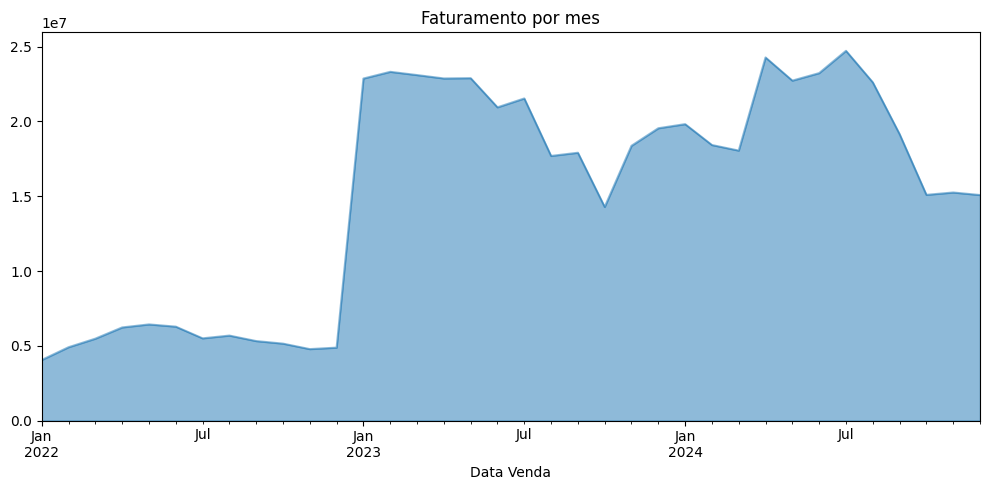

In [160]:
import matplotlib.pyplot as plt

vendas_por_mes.plot.area(figsize=(10, 5), alpha=0.5)
plt.title('Faturamento por mes')
plt.tight_layout()
plt.show()

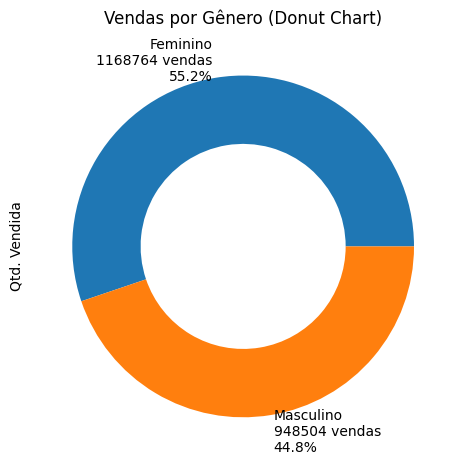

In [ ]:
text = lambda p: f'{p:.1f}%\n({int(p * qtd_vendida / 100)})'
labels = [f'{cat}\n{val} vendas\n{val/qtd_vendida:.1%}' for cat, val in zip(vendas_por_genero.index, vendas_por_genero)]
vendas_por_genero.plot.pie(labels=labels,startangle=90, wedgeprops={'width': 0.4})
plt.title('Vendas por Gênero')
plt.tight_layout()
plt.show()